# Package ingest

In [68]:
# Importing Python packages

import pandas as pd
import numpy as np
import plotnine as p9
import os
import geopandas as gpd
from pathlib import Path


# Data ingest

In [69]:
# Reading in phased development data
phased_development = pd.read_csv('pipeline_example_output.csv')
phased_development.head(1)

,Unnamed: 0,ProjectID,land_use,year,percent_development_pa,status,development_pa
0,0,2100.0,Residential - Villas Emiratis (Units),2024,0.5,Under Construction,0.0


In [70]:
# Reading in baseline TAZ data

sharepoint_path = f'C:/Users/{os.environ.get( "USERNAME" )}/Buro Happold'
project_path = Path(f"{sharepoint_path}/P060927 Plan Capital 2040 - 02_Documents/11_GIS/05 Urban Models")
ium_path = os.path.join(project_path,'ium_ad.gpkg')
zone_taz_2022 = gpd.read_file(ium_path, layer='zone_taz_2022')
zone_taz_2022.head(1)

,Z,SHAPE_Length,SHAPE_Area,NUM_OF_BUILDINGS,Calc_Total_Ex_GFA,Ex_GFA,RES_GFA,Residential_Labour_GFA,OFFICE_GFA,RETAIL_GFA,...,RETMAL_PRO,MEDCLI_PRO,MEDHOS_PRO,NONTER_PRO,TER_PRO,SCHPLCS_NT,SCHPLCS_TE,SCHPLCS_PR,SCHPLCS_SE,geometry
0,1044,46364.0,600150.0,675.0,295592.0,296118.0,269986.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((270352.336 2727199.707, 269735..."


In [71]:
# Bringing in MP to TAZ development deltas

zone_taz_delta = gpd.read_file(ium_path, layer='zone_taz_delta')
zone_taz_delta.head(1)


,Z,ZONE,EPA,UPC_PRECIN,PRECINCT_N,ST_DIST_ID,ST_DIST_EN,UDM_DIST_I,UDM_DIST_E,REGION,...,score_ex_gfa_total_in_1km_rank,score_networkrail_nearest_m_rank,landmodel_component_rank_sum,landmodel_component_rank_mean,landmodel_component_rank_sum_rank,landmodel_component_rank_mean_rank,landmodel_development_score,gfa_per_ha,landmodel_limit_gfa_per_ha,geometry
0,1044,1044,None,7.0,Al Rahba,88.0,Al Rahba,1.0,AL RAHBA,ADM,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1410.696039,NaN,"MULTIPOLYGON (((270352.336 2727199.707, 269735..."


In [73]:
    zone_taz_delta.columns

Index(['Z', 'ZONE', 'EPA', 'UPC_PRECIN', 'PRECINCT_N', 'ST_DIST_ID',
       'ST_DIST_EN', 'UDM_DIST_I', 'UDM_DIST_E', 'REGION', 'AREA', 'CENTROIDX',
       'CENTROIDY', 'TMP_NAME', 'AREATYPE', '2022_SHAPE_Length',
       '2022_SHAPE_Area', '2022_NUM_OF_BUILDINGS', '2022_Calc_Total_Ex_GFA',
       '2022_Ex_GFA', '2022_RES_GFA', '2022_Residential_Labour_GFA',
       '2022_OFFICE_GFA', '2022_RETAIL_GFA', '2022_Hotel_GFA',
       '2022_Commercial_Recreation_GFA', '2022_Industrial_GFA',
       '2022_SCHOOL_GFA', '2022_MED_GFA', '2022_RELIGIOUS_GFA',
       '2022_GOV_INST_SOC_CULT_GFA', '2022_OPENSPACE_RECREATION_GFA',
       '2022_Community_Facilities_GFA', '2022_AGRICULTURE_GFA',
       '2022_OTHER_GFA', '2022_ST_Other_GFA', '2022_INFRASTRUCTURE_GFA',
       '2022_Hotel_Rooms', '2022_Villa_Units', '2022_Apt_Units',
       '2022_DC_Max_GFA', '2022_DC_Res_GFA', '2022_DC_Office_GFA',
       '2022_DC_Retail_GFA', '2022_DC_Hotel_GFA', '2022_DC_Industrial_GFA',
       '2022_Allowed_GFA', '2022_H

In [79]:
# Calculating gfa developm capacity caps for each TAZ

taz_max_capacities = zone_taz_delta[['ZONE','masterplan_projectid','AREA','landmodel_limit_gfa_per_ha']]
taz_max_capacities['max_capacity_gfa'] = taz_max_capacities['AREA'] * taz_max_capacities['landmodel_limit_gfa_per_ha']
taz_max_capacities = taz_max_capacities[['ZONE','masterplan_projectid','max_capacity_gfa']]
taz_max_capacities.head(5)

C:\Users\jtindale\AppData\Local\Temp\ipykernel_25852\1427401986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ZONE,masterplan_projectid,max_capacity_gfa
0,1044,None,NaN
1,1310,None,NaN
2,2656,None,NaN
3,1318,None,NaN
4,1320,None,NaN


c:\Users\jtindale\AppData\Local\miniforge3\envs\landmodel\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 89'. Pick better value with 'binwidth'.


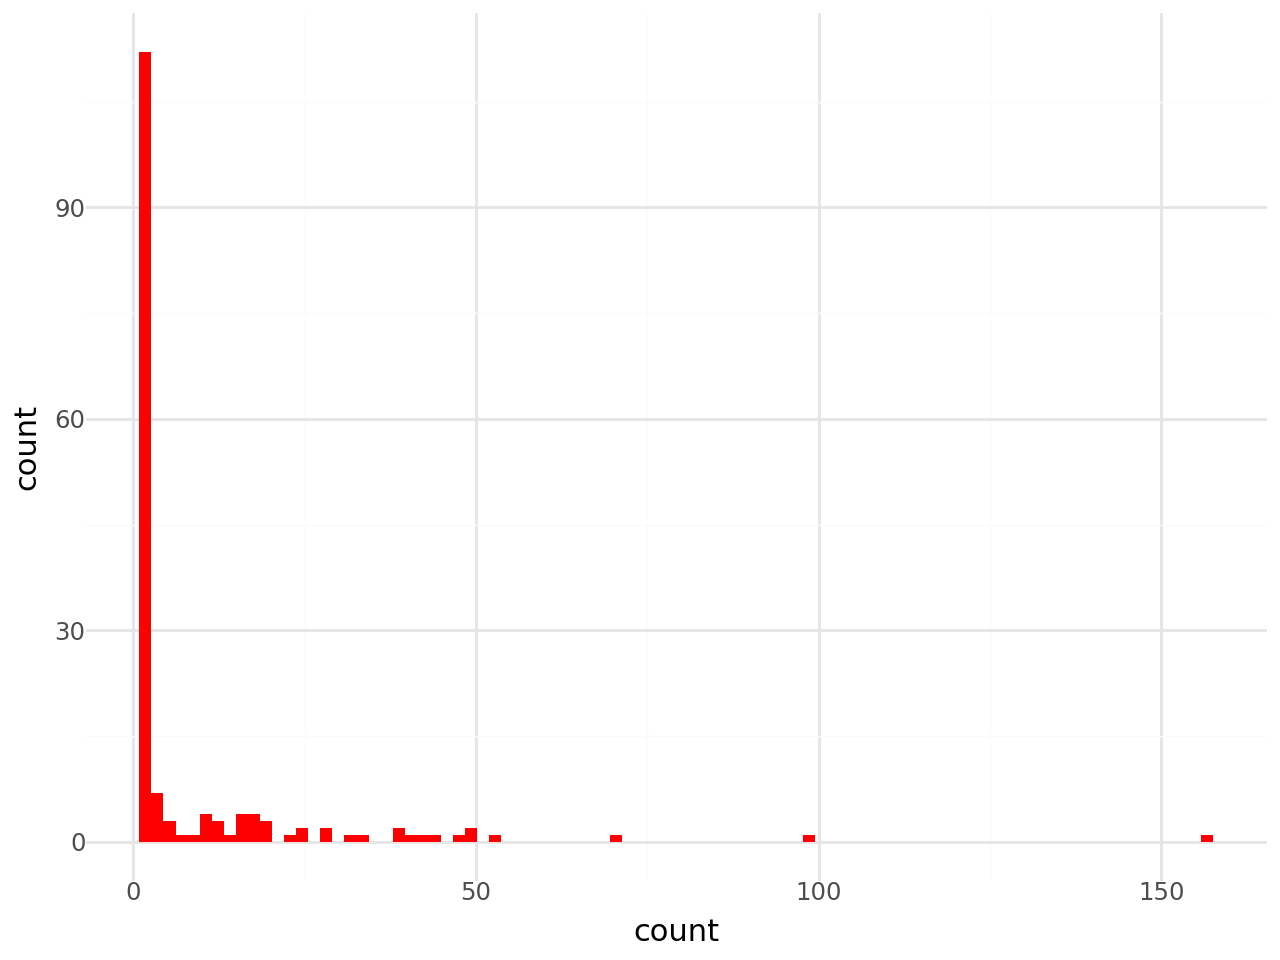

In [ ]:
check = phased_development['ProjectID'].unique()
check= pd.DataFrame({'ProjectID':check})
check_2 = zone_taz_delta[['ZONE','masterplan_projectid']].rename({'masterplan_projectid':'ProjectID'},axis = 1)
check = check.merge(check_2,how = 'left', on = 'ProjectID')
check['count'] = 1
check  = check.groupby(['ProjectID'])['count'].sum().reset_index()

(p9.ggplot(check,p9.aes(x = 'count')) +
 p9.geom_histogram(fill = 'red') + 
 p9.theme_minimal())


In [ ]:
zone_taz_delta[zone_taz_delta['masterplan_projectid'].isna()]

,Z,ZONE,EPA,UPC_PRECIN,PRECINCT_N,ST_DIST_ID,ST_DIST_EN,UDM_DIST_I,UDM_DIST_E,REGION,...,score_ex_gfa_total_in_1km_rank,score_networkrail_nearest_m_rank,landmodel_component_rank_sum,landmodel_component_rank_mean,landmodel_component_rank_sum_rank,landmodel_component_rank_mean_rank,landmodel_development_score,gfa_per_ha,landmodel_limit_gfa_per_ha,geometry
0,1044,1044,None,7.0,Al Rahba,88.0,Al Rahba,1.0,AL RAHBA,ADM,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1410.696039,NaN,"MULTIPOLYGON (((270352.336 2727199.707, 269735..."
1,1310,1310,None,13.0,Baniyas,95.0,Al Nahda,54.0,AL NAHDA,ADM,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,153.469220,NaN,"MULTIPOLYGON (((278888.425 2680518.149, 278729..."
2,2656,2656,None,1.0,Abu Dhabi,90.0,Al Jarf (Hizam Al Ghabat)_N,1061.0,AL JARF (HIZAM AL GHABAT),ADM,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.344872,NaN,"MULTIPOLYGON (((312365.810 2730691.280, 311820..."
3,1318,1318,None,1.0,Abu Dhabi,103.0,Al Jarf (Hizam Al Ghabat),1220.0,AJBAN,ADM,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.952259,NaN,"MULTIPOLYGON (((273587.131 2724117.971, 276521..."
4,1320,1320,None,31.0,Ghantoot,90.0,Al Jarf (Hizam Al Ghabat)_N,1061.0,AL JARF (HIZAM AL GHABAT),ADM,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,7.749621,NaN,"MULTIPOLYGON (((286684.552 2749587.130, 286699..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,3092,3092,None,32.0,Umm Lefeenah Island,10.0,Sadiyat And Lefeenah Island And Other Inner Is...,16.0,UMM LEFEENAH ISLAND,ADM,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((239189.191 2710898.797, 239024..."
2401,92,92,Y,19.0,Inner Islands,11.0,Abu Dhabi Island And Other Inner Islands,20.0,AL GARM,ADM,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((239373.175 2710452.427, 239608..."
2402,2772,2772,None,9.0,Al Reem,10.0,Sadiyat And Lefeenah Island And Other Inner Is...,57.0,AL REEM ISLAND,ADM,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((238413.533 2711680.728, 238425..."
2403,2773,2773,None,9.0,Al Reem,10.0,Sadiyat And Lefeenah Island And Other Inner Is...,57.0,AL REEM ISLAND,ADM,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((238239.662 2711562.393, 238262..."


In [ ]:
# Ingesting MP land use to TAZ land use crosswalk

crosswalks = pd.read_csv('taxonomy_crosswalks.csv')
crosswalks = crosswalks[crosswalks['crosswalk'] == 'MP Committed Development to GIS Use']

# Filtering out the following land uses from the crosswalk dataframe

mp_land_use_exclusion = ['Residential - Labour Accommodation (Units)'] #  Land uses to exclude for the crosswalk
crosswalks = crosswalks[~crosswalks['variable_1'].isin(mp_land_use_exclusion)] # Filtering the crosswalk
crosswalks = crosswalks.drop('Notes',axis = 1) # Dropping notes column
crosswalks.head(3)

,crosswalk,variable_1,variable_2
0,MP Committed Development to GIS Use,Residential - Villas Emiratis (Units),Villa_Units
1,MP Committed Development to GIS Use,Residential - Villas Non-Emiratis (Units),Villa_Units
2,MP Committed Development to GIS Use,Residential - Apartments (Units),Apt_Units


In [80]:
# Creating a list columns to create the taz_existing_gfa dataframe

land_uses_2022 = ['ZONE','masterplan_projectid','2022_NUM_OF_BUILDINGS','2022_Calc_Total_Ex_GFA','2022_Ex_GFA','2022_RES_GFA','2022_Residential_Labour_GFA','2022_OFFICE_GFA','2022_RETAIL_GFA','2022_Hotel_GFA','2022_Commercial_Recreation_GFA','2022_Industrial_GFA','2022_SCHOOL_GFA','2022_MED_GFA','2022_RELIGIOUS_GFA','2022_GOV_INST_SOC_CULT_GFA','2022_OPENSPACE_RECREATION_GFA','2022_Community_Facilities_GFA','2022_AGRICULTURE_GFA','2022_OTHER_GFA','2022_ST_Other_GFA','2022_INFRASTRUCTURE_GFA','2022_Hotel_Rooms','2022_Villa_Units','2022_Apt_Units','2022_HH','2022_HOTELROOMS']

# Creating the dataframe with existing TAZ gfa

taz_existing_gfa = zone_taz_delta.loc[:,land_uses_2022]
taz_existing_gfa

,ZONE,masterplan_projectid,2022_NUM_OF_BUILDINGS,2022_Calc_Total_Ex_GFA,2022_Ex_GFA,2022_RES_GFA,2022_Residential_Labour_GFA,2022_OFFICE_GFA,2022_RETAIL_GFA,2022_Hotel_GFA,...,2022_Community_Facilities_GFA,2022_AGRICULTURE_GFA,2022_OTHER_GFA,2022_ST_Other_GFA,2022_INFRASTRUCTURE_GFA,2022_Hotel_Rooms,2022_Villa_Units,2022_Apt_Units,2022_HH,2022_HOTELROOMS
0,1044,None,675.0,295592.0,296118.0,269986.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1124.0,1124.0,753.0,0.0,329.0,11.0,340.0,0.0
1,1310,None,541.0,223794.0,224058.0,152630.0,0.0,0.0,6490.0,0.0,...,0.0,12060.0,16703.0,16703.0,916.0,0.0,154.0,16.0,170.0,0.0
2,2656,None,6.0,1091.0,1091.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1091.0,0.0,0.0,0.0,0.0,0.0
3,1318,None,738.0,102025.0,102379.0,11129.0,0.0,0.0,0.0,0.0,...,0.0,90273.0,90864.0,90864.0,31.0,0.0,2.0,0.0,2.0,0.0
4,1320,None,5.0,8977.0,8977.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8977.0,8977.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,790,1995.0,224.0,195698.0,195698.0,9960.0,0.0,2020.0,0.0,0.0,...,0.0,0.0,29098.0,29098.0,13755.0,0.0,0.0,0.0,0.0,0.0
2434,3474,1995.0,209.0,217530.0,217693.0,24626.0,0.0,749.0,11341.0,0.0,...,0.0,0.0,4024.0,4024.0,64.0,0.0,0.0,0.0,0.0,0.0
2435,787,1994.0,151.0,281700.0,281771.0,9440.0,0.0,0.0,0.0,0.0,...,0.0,0.0,472.0,472.0,162.0,0.0,0.0,0.0,0.0,0.0
2436,3475,1995.0,67.0,105935.0,105935.0,8877.0,0.0,0.0,1931.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
taz_existing_gfa

,ZONE,masterplan_projectid,2022_NUM_OF_BUILDINGS,2022_Calc_Total_Ex_GFA,2022_Ex_GFA,2022_RES_GFA,2022_Residential_Labour_GFA,2022_OFFICE_GFA,2022_RETAIL_GFA,2022_Hotel_GFA,...,2022_Community_Facilities_GFA,2022_AGRICULTURE_GFA,2022_OTHER_GFA,2022_ST_Other_GFA,2022_INFRASTRUCTURE_GFA,2022_Hotel_Rooms,2022_Villa_Units,2022_Apt_Units,2022_HH,2022_HOTELROOMS
0,1044,None,675.0,295592.0,296118.0,269986.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1124.0,1124.0,753.0,0.0,329.0,11.0,340.0,0.0
1,1310,None,541.0,223794.0,224058.0,152630.0,0.0,0.0,6490.0,0.0,...,0.0,12060.0,16703.0,16703.0,916.0,0.0,154.0,16.0,170.0,0.0
2,2656,None,6.0,1091.0,1091.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1091.0,0.0,0.0,0.0,0.0,0.0
3,1318,None,738.0,102025.0,102379.0,11129.0,0.0,0.0,0.0,0.0,...,0.0,90273.0,90864.0,90864.0,31.0,0.0,2.0,0.0,2.0,0.0
4,1320,None,5.0,8977.0,8977.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8977.0,8977.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,790,1995.0,224.0,195698.0,195698.0,9960.0,0.0,2020.0,0.0,0.0,...,0.0,0.0,29098.0,29098.0,13755.0,0.0,0.0,0.0,0.0,0.0
2434,3474,1995.0,209.0,217530.0,217693.0,24626.0,0.0,749.0,11341.0,0.0,...,0.0,0.0,4024.0,4024.0,64.0,0.0,0.0,0.0,0.0,0.0
2435,787,1994.0,151.0,281700.0,281771.0,9440.0,0.0,0.0,0.0,0.0,...,0.0,0.0,472.0,472.0,162.0,0.0,0.0,0.0,0.0,0.0
2436,3475,1995.0,67.0,105935.0,105935.0,8877.0,0.0,0.0,1931.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
